In [36]:
import sys
directory_path = '/home/mgadaloff/SAFT_ML/SAFT_ML_VE/lib/python3.10/site-packages'
sys.path.append(directory_path)
#sys.path

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from feos.pcsaft import *
from feos.eos import *
from feos.si import *

In [38]:
# For a custom component

identifier = Identifier(cas='0000-0000', name='Methane', iupac_name='methane', 
smiles='C', inchi='NA', formula='CH4')
psr = PcSaftRecord(m=1.5181, sigma=3.2367, epsilon_k=157.952, mu=0.201893)
test_species = PureRecord(identifier, molarweight=16.043, model_record=psr)

parameters = PcSaftParameters.new_pure(test_species)
parameters

|component|molarweight|$m$|$\sigma$|$\varepsilon$|$\mu$|$Q$|$\kappa_{AB}$|$\varepsilon_{AB}$|$N_A$|$N_B$|
|-|-|-|-|-|-|-|-|-|-|-|
|Methane|16.043|1.5181|3.2367|157.952|0.201893|0|0|0|1|1|

In [39]:
pcsaft = EquationOfState.pcsaft(parameters)

In [40]:
phase_diagram = PhaseDiagram.pure(pcsaft, min_temperature=91*KELVIN, npoints=501)
df = pd.DataFrame(phase_diagram.to_dict())

In [41]:
test_species_exptl_data = pd.read_excel("test_species_data.xlsx")

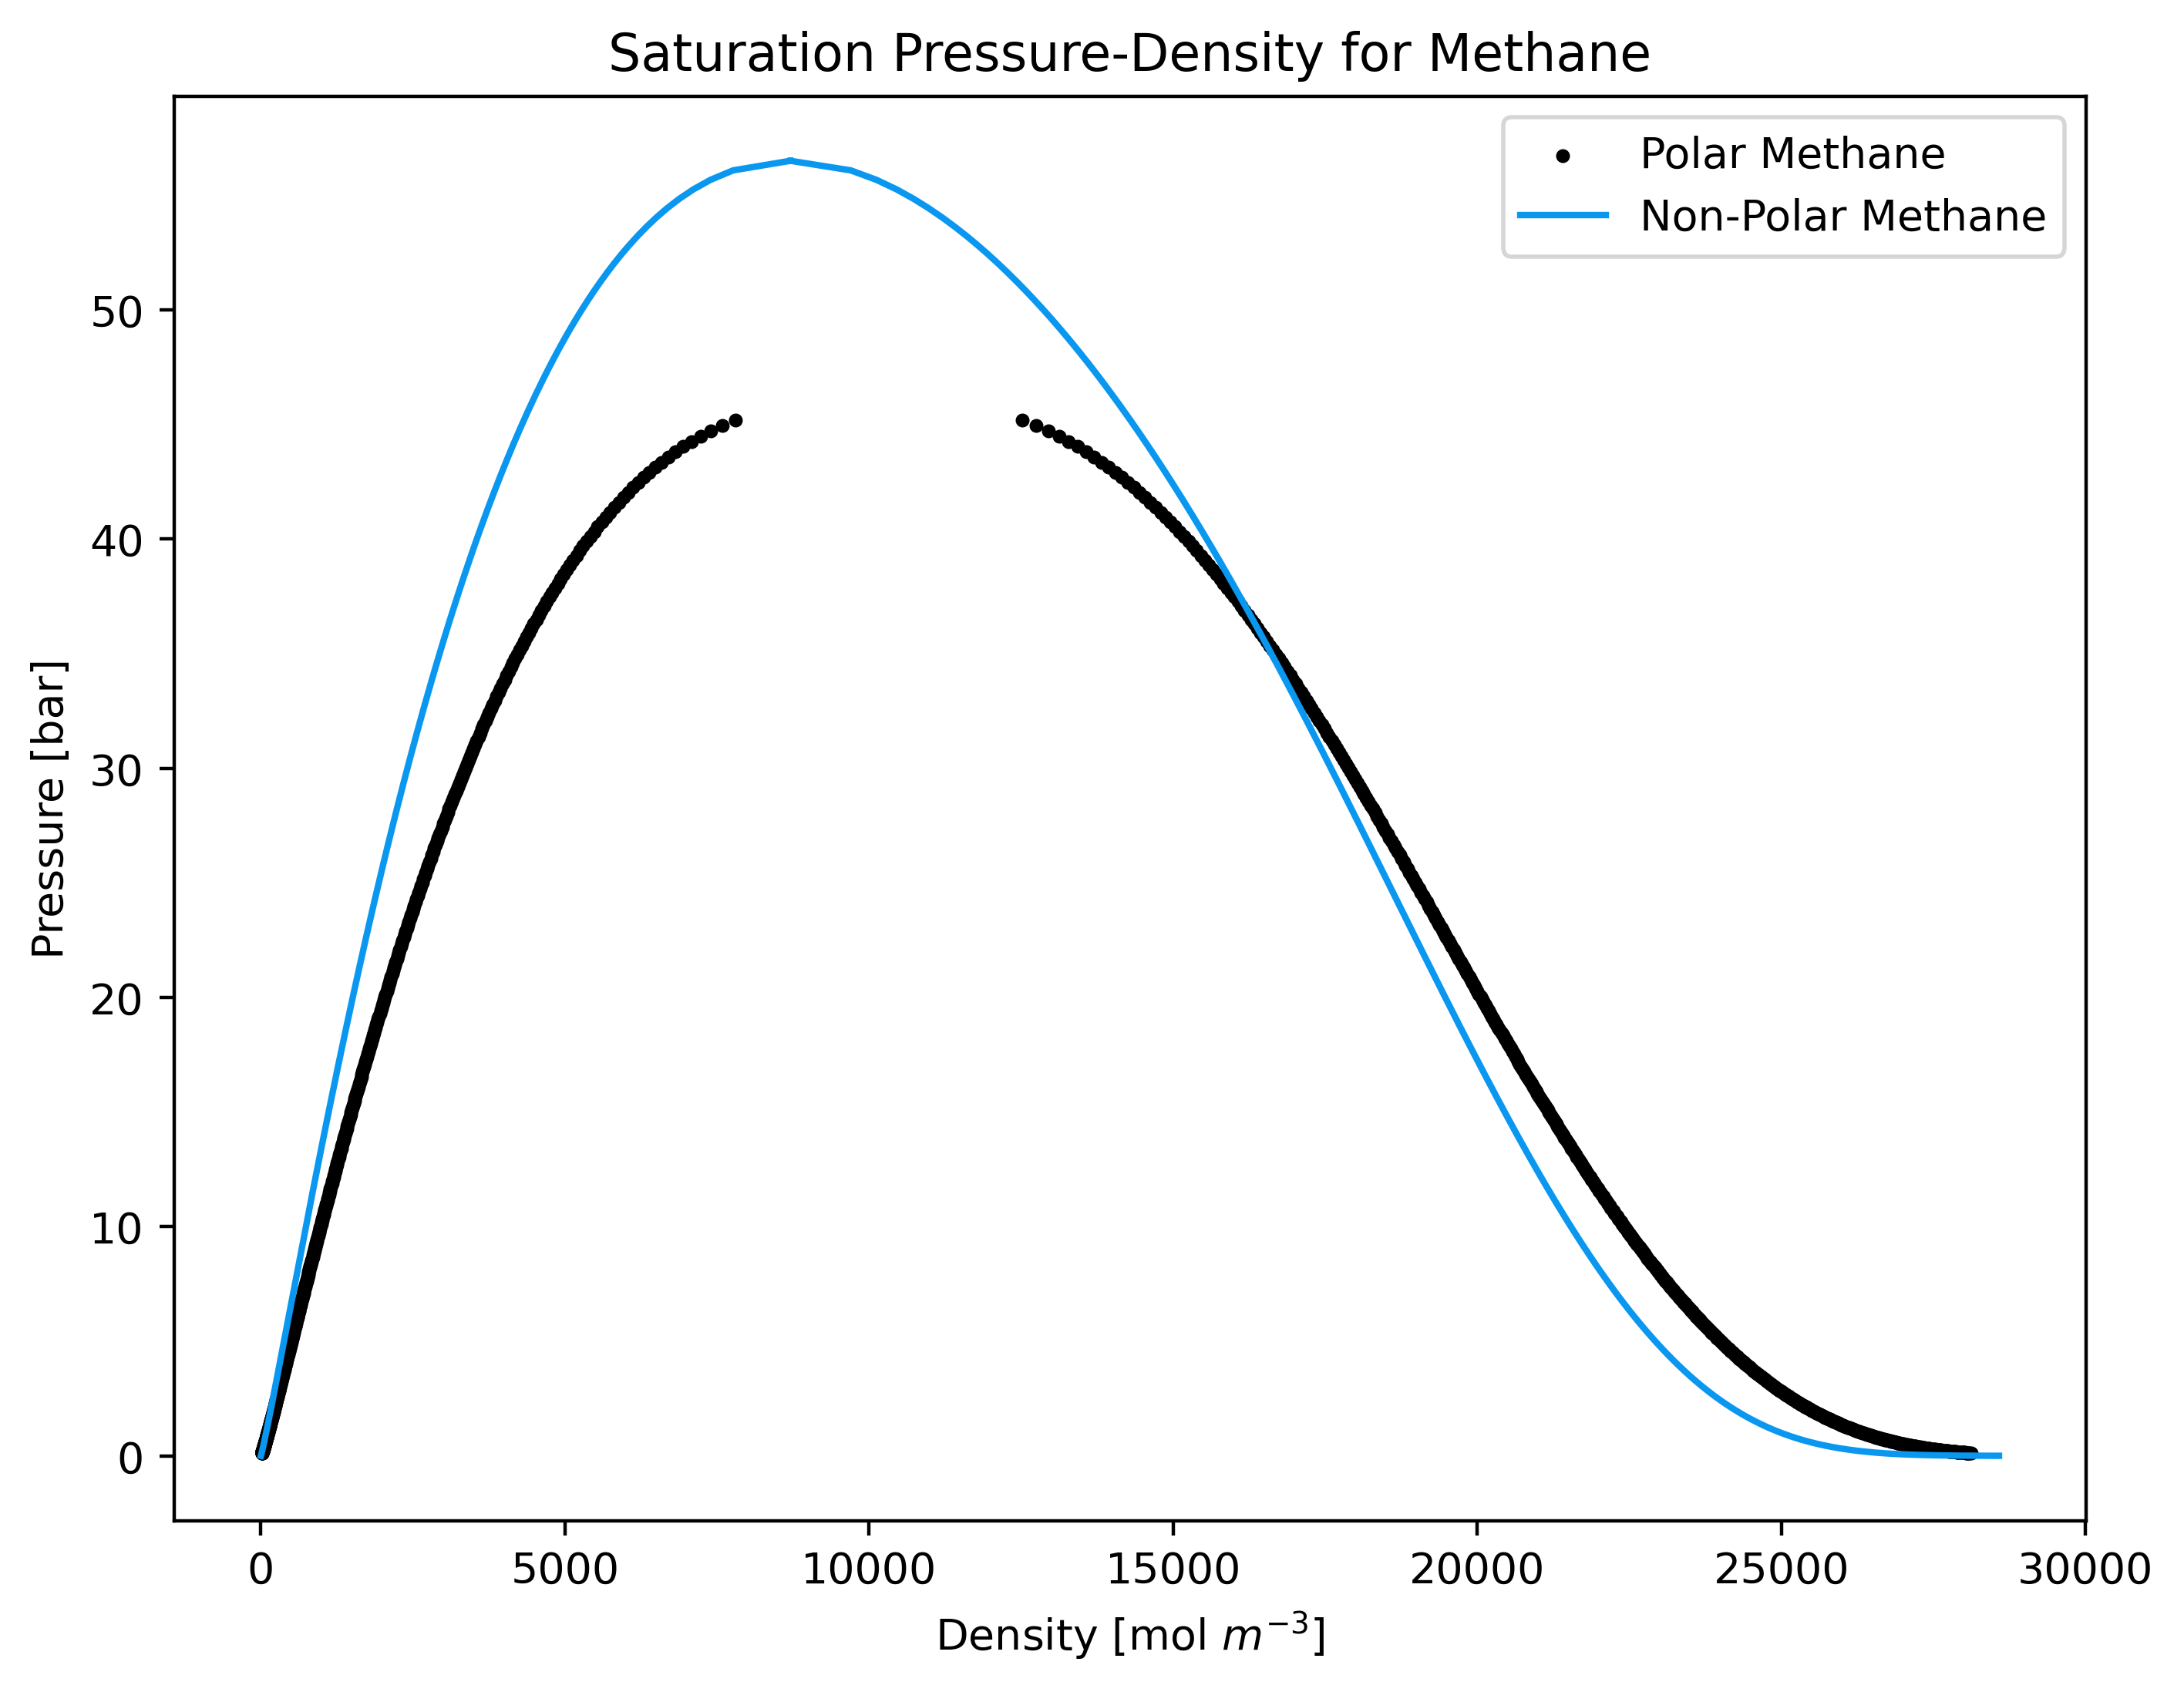

In [43]:
plt.figure(figsize=(8, 6), dpi=400)

plt.scatter(test_species_exptl_data["Density (mol/l)"],test_species_exptl_data["Pressure (bar)"],s=5,facecolors='k')
plt.plot(df["density vapor"],df.pressure/10**5,color='#0a97f0')
plt.plot(df["density liquid"],df.pressure/10**5,color='#0a97f0')
plt.title(f"Saturation Pressure-Density for {parameters.pure_records[0].identifier.name}")
plt.xlabel("Density [mol $m^{-3}$]")
plt.ylabel("Pressure [bar]")
plt.legend(["Polar Methane","Non-Polar Methane"])

plt.savefig("methane_envelopes.png",dpi=400)